# Stock Technical Analysis: Python Tutorial

Future Returns

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating the Stochastic Oscillator.

In this Tutorial, we walk through calculating 5-day, 10-day, and 20-day future returns, from historical data.

Caculating 5-day, 10-day, and 20-day future returns will allow us to identify relationships between current technical indicators and future returns. 

Let’s use Python to compute the 5-day, 10-day, and 20-day future returns. 

1.) Import modules.

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.) Define function for querying daily close.

In [5]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

3.) Define function for calculating the 5-day future return.

In [6]:
def fiveday(close):  
    fiveday = ((close - close.shift(-5)) / close) * 100
    return fiveday

4.) Define function for calculating 10-day future return. 

In [7]:
def tenday(close):  
    tenday = ((close - close.shift(-10)) / close) * 100
    return tenday

5.) Define function for calculating 20-day future return.

In [8]:
def twentyday(close):  
    twentyday = ((close - close.shift(-10)) / close) * 100
    return twentyday

6.) Query daily close.

In [9]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))

7.) Run daily close through fiveday, tenday, and twentday functions. Save series to new columns in dataframe. 

In [11]:
df['5 day'] = fiveday(df['Close'])
df['10 day'] = tenday(df['Close'])
df['20 day'] = twentyday(df['Close'])
df = df.dropna()
df.tail()

,Close,5 day,10 day,20 day
Date,,,,
2016-12-09,119.68,-0.158757,2.013703,2.013703
2016-12-12,117.77,-1.248196,-0.203787,-0.203787
2016-12-13,120.31,1.014047,2.817721,2.817721
2016-12-14,120.21,0.973297,3.211047,3.211047
2016-12-15,120.57,2.629178,4.578253,4.578253


8.) Plot average 5-day, 10-day, and 20-day future returns.

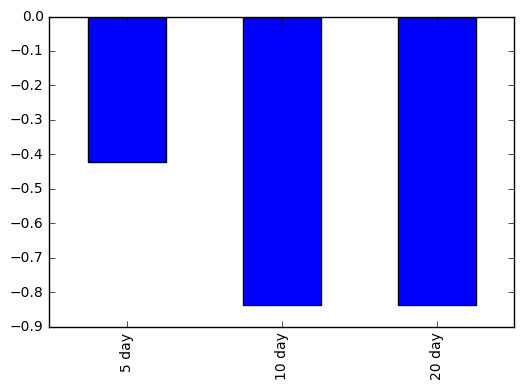

In [28]:
df2 = df[['5 day', '10 day', '20 day']].mean()
df2.plot(kind='bar')

There you have it! We calculated 5-day, 10-day, and 20-day future returns. Here’s the full code:

In [12]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
def fiveday(close):  
    fiveday = ((close - close.shift(-5)) / close) * 100
    return fiveday

def tenday(close):  
    tenday = ((close - close.shift(-10)) / close) * 100
    return tenday

def twentyday(close):  
    twentyday = ((close - close.shift(-10)) / close) * 100
    return twentyday

df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['5 day'] = fiveday(df['Close'])
df['10 day'] = tenday(df['Close'])
df['20 day'] = twentyday(df['Close'])
df = df.dropna()
df.tail()

,Close,5 day,10 day,20 day
Date,,,,
2016-12-09,119.68,-0.158757,2.013703,2.013703
2016-12-12,117.77,-1.248196,-0.203787,-0.203787
2016-12-13,120.31,1.014047,2.817721,2.817721
2016-12-14,120.21,0.973297,3.211047,3.211047
2016-12-15,120.57,2.629178,4.578253,4.578253
